In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
import argparse
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [0]:
class Neural_Net(object):
    def __init__(self, layers):
        self.dims = layers[0]
        self.activations = layers[1]
        self.params = {}
        self.L = len(self.dims)
        self.n = 0
        self.losses = []
        self.cache = {}


    def init_params(self):
        np.random.seed(1)

        for l in range(0, len(self.dims) - 1):
            self.params["W" + str(l+1)] = np.random.randn(self.dims[l+1], self.dims[l]) / np.sqrt(
                self.dims[l])
            self.params["b" + str(l+1)] = np.zeros((self.dims[l+1], 1))


    def relu(self, Z):
        return np.maximum(0,Z)


    def sigmoid(self, Z):
        return 1 / (1 + np.exp(-Z))


    def softmax(self, Z):
        expZ = np.exp(Z - np.max(Z))
        return expZ / expZ.sum(axis=0, keepdims=True)


    def activation(self, Z, activations):
        if activations == 'sigmoid':
            A = self.sigmoid(Z)
        elif activations == 'relu':
            A = self.relu(Z)
        elif activations == 'softmax':
            A = self.softmax(Z)
        return A

    def forward(self, X):
        # cache = {}

        A = X.T

        for l in range(self.L - 1):
            Z = self.params["W" + str(l + 1)].dot(A) + self.params["b" + str(l + 1)]
            A = self.activation(Z, self.activations[l])

            self.cache["A" + str(l + 1)] = A
            self.cache["W" + str(l + 1)] = self.params["W" + str(l + 1)]
            self.cache["Z" + str(l + 1)] = Z

        Z = self.params["W" + str(self.L)].dot(A) + self.params["b" + str(self.L)]
        A = self.activation(Z, self.activations[self.L - 1])

        self.cache["A" + str(self.L)] = A
        self.cache["W" + str(self.L)] = self.params["W" + str(self.L)]
        self.cache["Z" + str(self.L)] = Z

        return A


    def sigmoid_derivative(self, Z):
        s = 1 / (1 + np.exp(-Z))
        return s * (1 - s)


    def relu_derivative(self, Z):
        Z[Z<=0] = 0
        Z[Z>0] = 1
        return Z


    def activation_derivative(self, Z, activations):
        if activations == 'sigmoid':
            dZ = self.sigmoid_derivative(Z)
        elif activations == 'relu':
            dZ = self.relu_derivative(Z)
        elif activations == 'softmax':
            dZ = 1
        return dZ


    def compute_loss(self, y, y_hat):
        return  -np.sum(y*np.log(y_hat.T))/self.n


    def backward(self, X, Y):
        derivatives = {}
        self.cache["A0"] = X.T

        A = self.cache["A" + str(self.L)]
        dZ = (A - Y.T)*(self.activation_derivative(self.cache["Z" + str(self.L)], self.activations[self.L - 1])) / self.n

        dW = dZ.dot(self.cache["A" + str(self.L - 1)].T)
        db = np.sum(dZ, axis=1, keepdims=True)
        dA_prev = self.cache["W" + str(self.L)].T.dot(dZ) 

        derivatives["dW" + str(self.L)] = dW
        derivatives["db" + str(self.L)] = db

        for l in range(self.L - 1, 0, -1):
            dZ = dA_prev * self.activation_derivative(self.cache["Z" + str(l)], self.activations[ l - 1])
            dW = dZ.dot(self.cache["A" + str(l - 1)].T)
            db = np.sum(dZ, axis=1, keepdims=True)
            if l > 1:
                dA_prev = self.cache["W" + str(l)].T.dot(dZ)
            derivatives["dW" + str(l)] = dW
            derivatives["db" + str(l)] = db

        return derivatives


    def update_weight(self, derivatives, lr):
 
        # update weight
        for l in range(1, self.L + 1):
            self.params["W" + str(l)] = self.params["W" + str(l)] - lr * derivatives[
                "dW" + str(l)]
            self.params["b" + str(l)] = self.params["b" + str(l)] - lr * derivatives[
                "db" + str(l)]


    def random_mini_batches(self,X,y,mini_batch_size):
        m = X.shape[0]
        mini_batches = []
        permutation = list(np.random.permutation(m))
        shuffled_X = X[permutation,:]
        shuffled_Y = y[permutation,:]

        # Step 2: Partition (shuffled_X, shuffled_Y). Minus the end case.
        num_complete_minibatches = math.floor(
            m / mini_batch_size)  # number of mini batches of size mini_batch_size in your partitionning
 
        for k in range(0, num_complete_minibatches):
            mini_batch_X = shuffled_X[ k * mini_batch_size: (k + 1) * mini_batch_size,:]
            mini_batch_Y = shuffled_Y[ k * mini_batch_size: (k + 1) * mini_batch_size,:]
            mini_batch = (mini_batch_X, mini_batch_Y)
            mini_batches.append(mini_batch)

        # Handling the end case (last mini-batch < mini_batch_size)
        if m % mini_batch_size != 0:
            mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size: m,:]
            mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size: m,:]
            mini_batch = (mini_batch_X, mini_batch_Y)
            mini_batches.append(mini_batch)

        return mini_batches


    def fit(self, X, Y, lr=0.01, epochs=20, batch_size=32):
        np.random.seed(1)
        self.n = batch_size
        self.dims.insert(0, X.shape[1])
        self.init_params()

        for e in range(epochs):
            mini_batches = self.random_mini_batches(X, Y, batch_size)

            for mini_batch_X, mini_batch_Y in mini_batches:
                A = self.forward(mini_batch_X)
                loss = self.compute_loss(mini_batch_Y, A)
                derivatives = self.backward(mini_batch_X, mini_batch_Y)
                self.update_weight(derivatives, lr)

            self.losses.append(loss)
            # print("Epochs",e + 1,"/", epochs, " - loss:", loss, " - acc:", self.evaluate(X, Y))
            print("Epochs %d/%d - loss: %.5f - acc: %.5f" % (e+1, epochs, loss, self.evaluate(X, Y)))

    def predict(self, X):
        A = self.forward(X)
        y_hat = np.argmax(A, axis=0)
        return y_hat


    def evaluate(self, X, Y):
        y_hat = self.predict(X)
        Y = np.argmax(Y, axis=1)
        accuracy = (y_hat == Y).mean()
        return accuracy * 100


    def plot_loss(self):
        plt.figure()
        plt.plot(np.arange(len(self.losses)), self.losses)
        plt.xlabel("epochs")
        plt.ylabel("loss")
        plt.show()

In [0]:
def pre_process_data(X_train, y_train, X_val, y_val, X_test):

    enc = OneHotEncoder(sparse=False)
    y_train = enc.fit_transform(y_train.reshape(len(y_train), -1))

    y_val = enc.transform(y_val.reshape(len(y_val), -1))

    return X_train, y_train, X_val, y_val, X_test

In [0]:
def load_data(path):
    df_train = pd.read_csv(path + 'train.csv')
    df_test = pd.read_csv(path + 'test.csv')

    df_features = df_train.iloc[:, 1:785]
    df_label = df_train.iloc[:, 0]

    X_test = df_test.iloc[:, 0:784]

    X_train, X_cv, y_train, y_cv = train_test_split(df_features, df_label, 
                                                test_size = 0.2,
                                                random_state = 1212)


    X_train = np.array(X_train).reshape(33600, 784)
    X_cv = np.array(X_cv).reshape(8400, 784)
    X_test = np.array(X_test).reshape(28000, 784)
    
    # Feature Normalization 
    X_train = X_train.astype('float32'); X_cv= X_cv.astype('float32'); X_test = X_test.astype('float32')
    X_train /= 255; X_cv /= 255; X_test /= 255
    y_train = np.array(y_train)
    y_cv = np.array(y_cv)
    return X_train, y_train, X_cv, y_cv, X_test

In [6]:
X_train, y_train, X_val, y_val, X_test = load_data('/content/drive/My Drive/digit-recognizer/')
X_train, y_train, X_val, y_val, X_test = pre_process_data(X_train, y_train, X_val, y_val, X_test)
print("X_train's shape: " + str(X_train.shape))
print("X_val's shape: " + str(X_val.shape))

X_train's shape: (33600, 784)
X_val's shape: (8400, 784)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [0]:
# Build neural network
layers_dims = [1000, 10]
act_fucntion = ['relu', 'softmax']
layers = (layers_dims, act_fucntion)
net = Neural_Net(layers)

Epochs 1/50 - loss: 0.14733 - acc: 93.83036
Epochs 2/50 - loss: 0.20904 - acc: 96.36310
Epochs 3/50 - loss: 0.03464 - acc: 97.48512
Epochs 4/50 - loss: 0.06322 - acc: 98.18750
Epochs 5/50 - loss: 0.02483 - acc: 98.54167
Epochs 6/50 - loss: 0.02772 - acc: 98.96131
Epochs 7/50 - loss: 0.01347 - acc: 99.14286
Epochs 8/50 - loss: 0.01462 - acc: 99.41667
Epochs 9/50 - loss: 0.02324 - acc: 99.49405
Epochs 10/50 - loss: 0.00571 - acc: 99.53571
Epochs 11/50 - loss: 0.01660 - acc: 99.79167
Epochs 12/50 - loss: 0.00925 - acc: 99.81845
Epochs 13/50 - loss: 0.00890 - acc: 99.88393
Epochs 14/50 - loss: 0.01139 - acc: 99.93452
Epochs 15/50 - loss: 0.02911 - acc: 99.96131
Epochs 16/50 - loss: 0.01101 - acc: 99.97917
Epochs 17/50 - loss: 0.00355 - acc: 99.98512
Epochs 18/50 - loss: 0.00575 - acc: 99.98810
Epochs 19/50 - loss: 0.01149 - acc: 99.99107
Epochs 20/50 - loss: 0.00511 - acc: 99.98810
Epochs 21/50 - loss: 0.00487 - acc: 99.99107
Epochs 22/50 - loss: 0.00487 - acc: 99.99405
Epochs 23/50 - loss

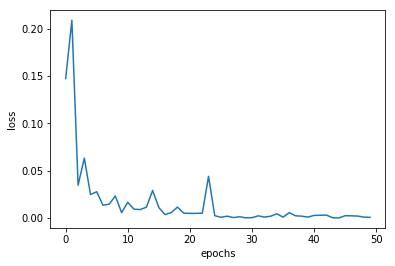

CPU times: user 19min 32s, sys: 12min 11s, total: 31min 43s
Wall time: 8min 15s


In [31]:
%%time
# Train network
net.fit(X_train, y_train, lr = 0.1, epochs=50, batch_size=32)
print("Train Accuracy: %.5f" % net.evaluate(X_train, y_train))
print("Test Accuracy: %.5f" % net.evaluate(X_val, y_val))
net.plot_loss()

In [0]:
# Predict with test data
y_hat = net.predict(X_test)

[3 1 8 3 3]


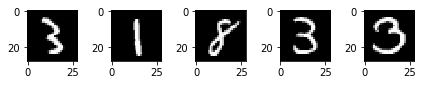

In [24]:
random_indexes = random.sample(range(X_test.shape[0]),5)
#Visualizing the orginal images
fig, axes = plt.subplots(nrows=1, ncols=5)
original_images = [X_test[i].reshape((28, 28)) for i in random_indexes]
i = 0
for ax in axes:
    ax.imshow(original_images[i], cmap ='gist_gray')
    i += 1
fig.tight_layout()
print(y_hat[random_indexes])

In [0]:
df = pd.DataFrame({'ImageId': np.arange(1, y_hat.shape[0]+ 1), 'Label': y_hat[:]})

In [0]:
export_csv = df.to_csv (r'submission.csv', index = None, header=True)

In [0]:
%%time
!python mnist_ann.py --path '/content/drive/My Drive/digit-recognizer/' --lr=0.1 --epochs=20 --batch_size=32

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
X_train's shape: (33600, 784)
X_val's shape: (8400, 784)
Epochs 1/20 - loss: 0.14733 - acc: 93.83036
Epochs 2/20 - loss: 0.20904 - acc: 96.36310
Epochs 3/20 - loss: 0.03464 - acc: 97.48512
Epochs 4/20 - loss: 0.06322 - acc: 98.18750
Epochs 5/20 - loss: 0.02483 - acc: 98.54167
Epochs 6/20 - loss: 0.02772 - acc: 98.96131
Epochs 7/20 - loss: 0.01347 - acc: 99.14286
Epochs 8/20 - loss: 0.01462 - acc: 99.41667
Epochs 9/20